In [ ]:
!pip install tensorflow

In [1]:
#Mengimpor pustaka yang diberikan
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Membuat dataset MNIST (dataset angka dan tulisan)
# Anda bisa menggantinya dengan dataset gambar lain
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing Data
# Mengubah dimensi data dan melakukan normalisasi (membuat nilai antara 0 dan 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

In [13]:
# Mengubah label menjadi bentuk one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [14]:
# Membangun model CNN
model = models.Sequential()

# Menambahkan layer konvolusi pertama
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan layer pooling (pengurangan dimensi)
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer konvolusi kedua
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan layer konvolusi ketiga
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan layer dense (fully connected layer)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # Output 10 kelas (untuk klasifikasi 0-9)

# Melihat arsitektur model
model.summary()

# Kompilasi model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.8574 - loss: 0.4547 - val_accuracy: 0.9841 - val_loss: 0.0494
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.9823 - loss: 0.0570 - val_accuracy: 0.9865 - val_loss: 0.0380
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9883 - loss: 0.0372 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9886 - val_loss: 0.0346
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9902 - val_loss: 0.0329


313/313 - 2s - 7ms/step - accuracy: 0.9902 - loss: 0.0329
Akurasi pada data uji: 0.9902


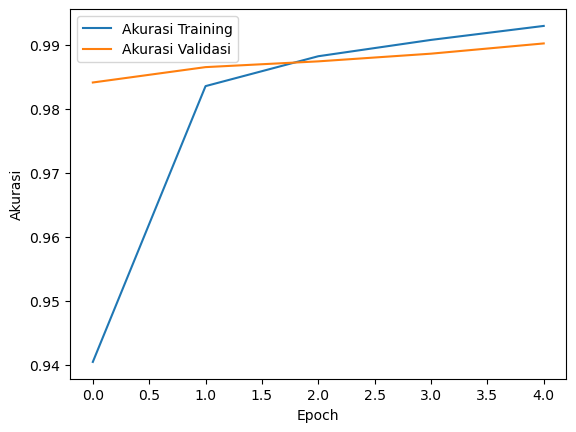

In [16]:
# Evaluasi model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Akurasi pada data uji: {test_acc:.4f}')

# Visualisasi hasil training
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os

# Path to the dataset folder
base_dir = 'C:/Users/Asus/Kampus merdeka/MSIB/Minggu 5/chest_xray/'

# ImageDataGenerator for preprocessing the images
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback untuk mengurangi learning rate jika performa stagnan
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 483s 3s/step - accuracy: 0.8268 - loss: 1.5648 - val_accuracy: 0.6250 - val_loss: 47.7827 - learning_rate: 0.0010
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - accuracy: 0.8995 - loss: 0.2503 - val_accuracy: 0.6250 - val_loss: 44.9471 - learning_rate: 0.0010
Epoch 3/10
 33/163 ━━━━━━━━━━━━━━━━━━━━ 6:29 3s/step - accuracy: 0.8970 - loss: 0.2263

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluasi pada data test
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Prediksi hasil test
test_preds = model.predict(test_generator)
test_preds = np.round(test_preds)

# Confusion matrix
test_labels = test_generator.classes
cm = confusion_matrix(test_labels, test_preds)
print("Confusion Matrix:")
print(cm)

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(test_labels, test_preds))
